# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
df=pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')

In [ ]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
df.shape

(1436, 38)

# EDA and Data Visulizations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)

In [ ]:
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
df1[df1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
df2=df1.drop_duplicates().reset_index(drop=True)

In [ ]:
df2.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


<Axes: >

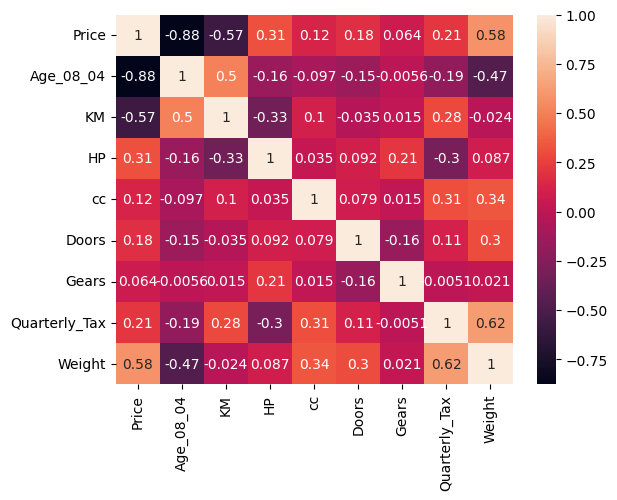

In [ ]:
sns.heatmap(df2.corr(),annot=True)

<Figure size 800x800 with 0 Axes>

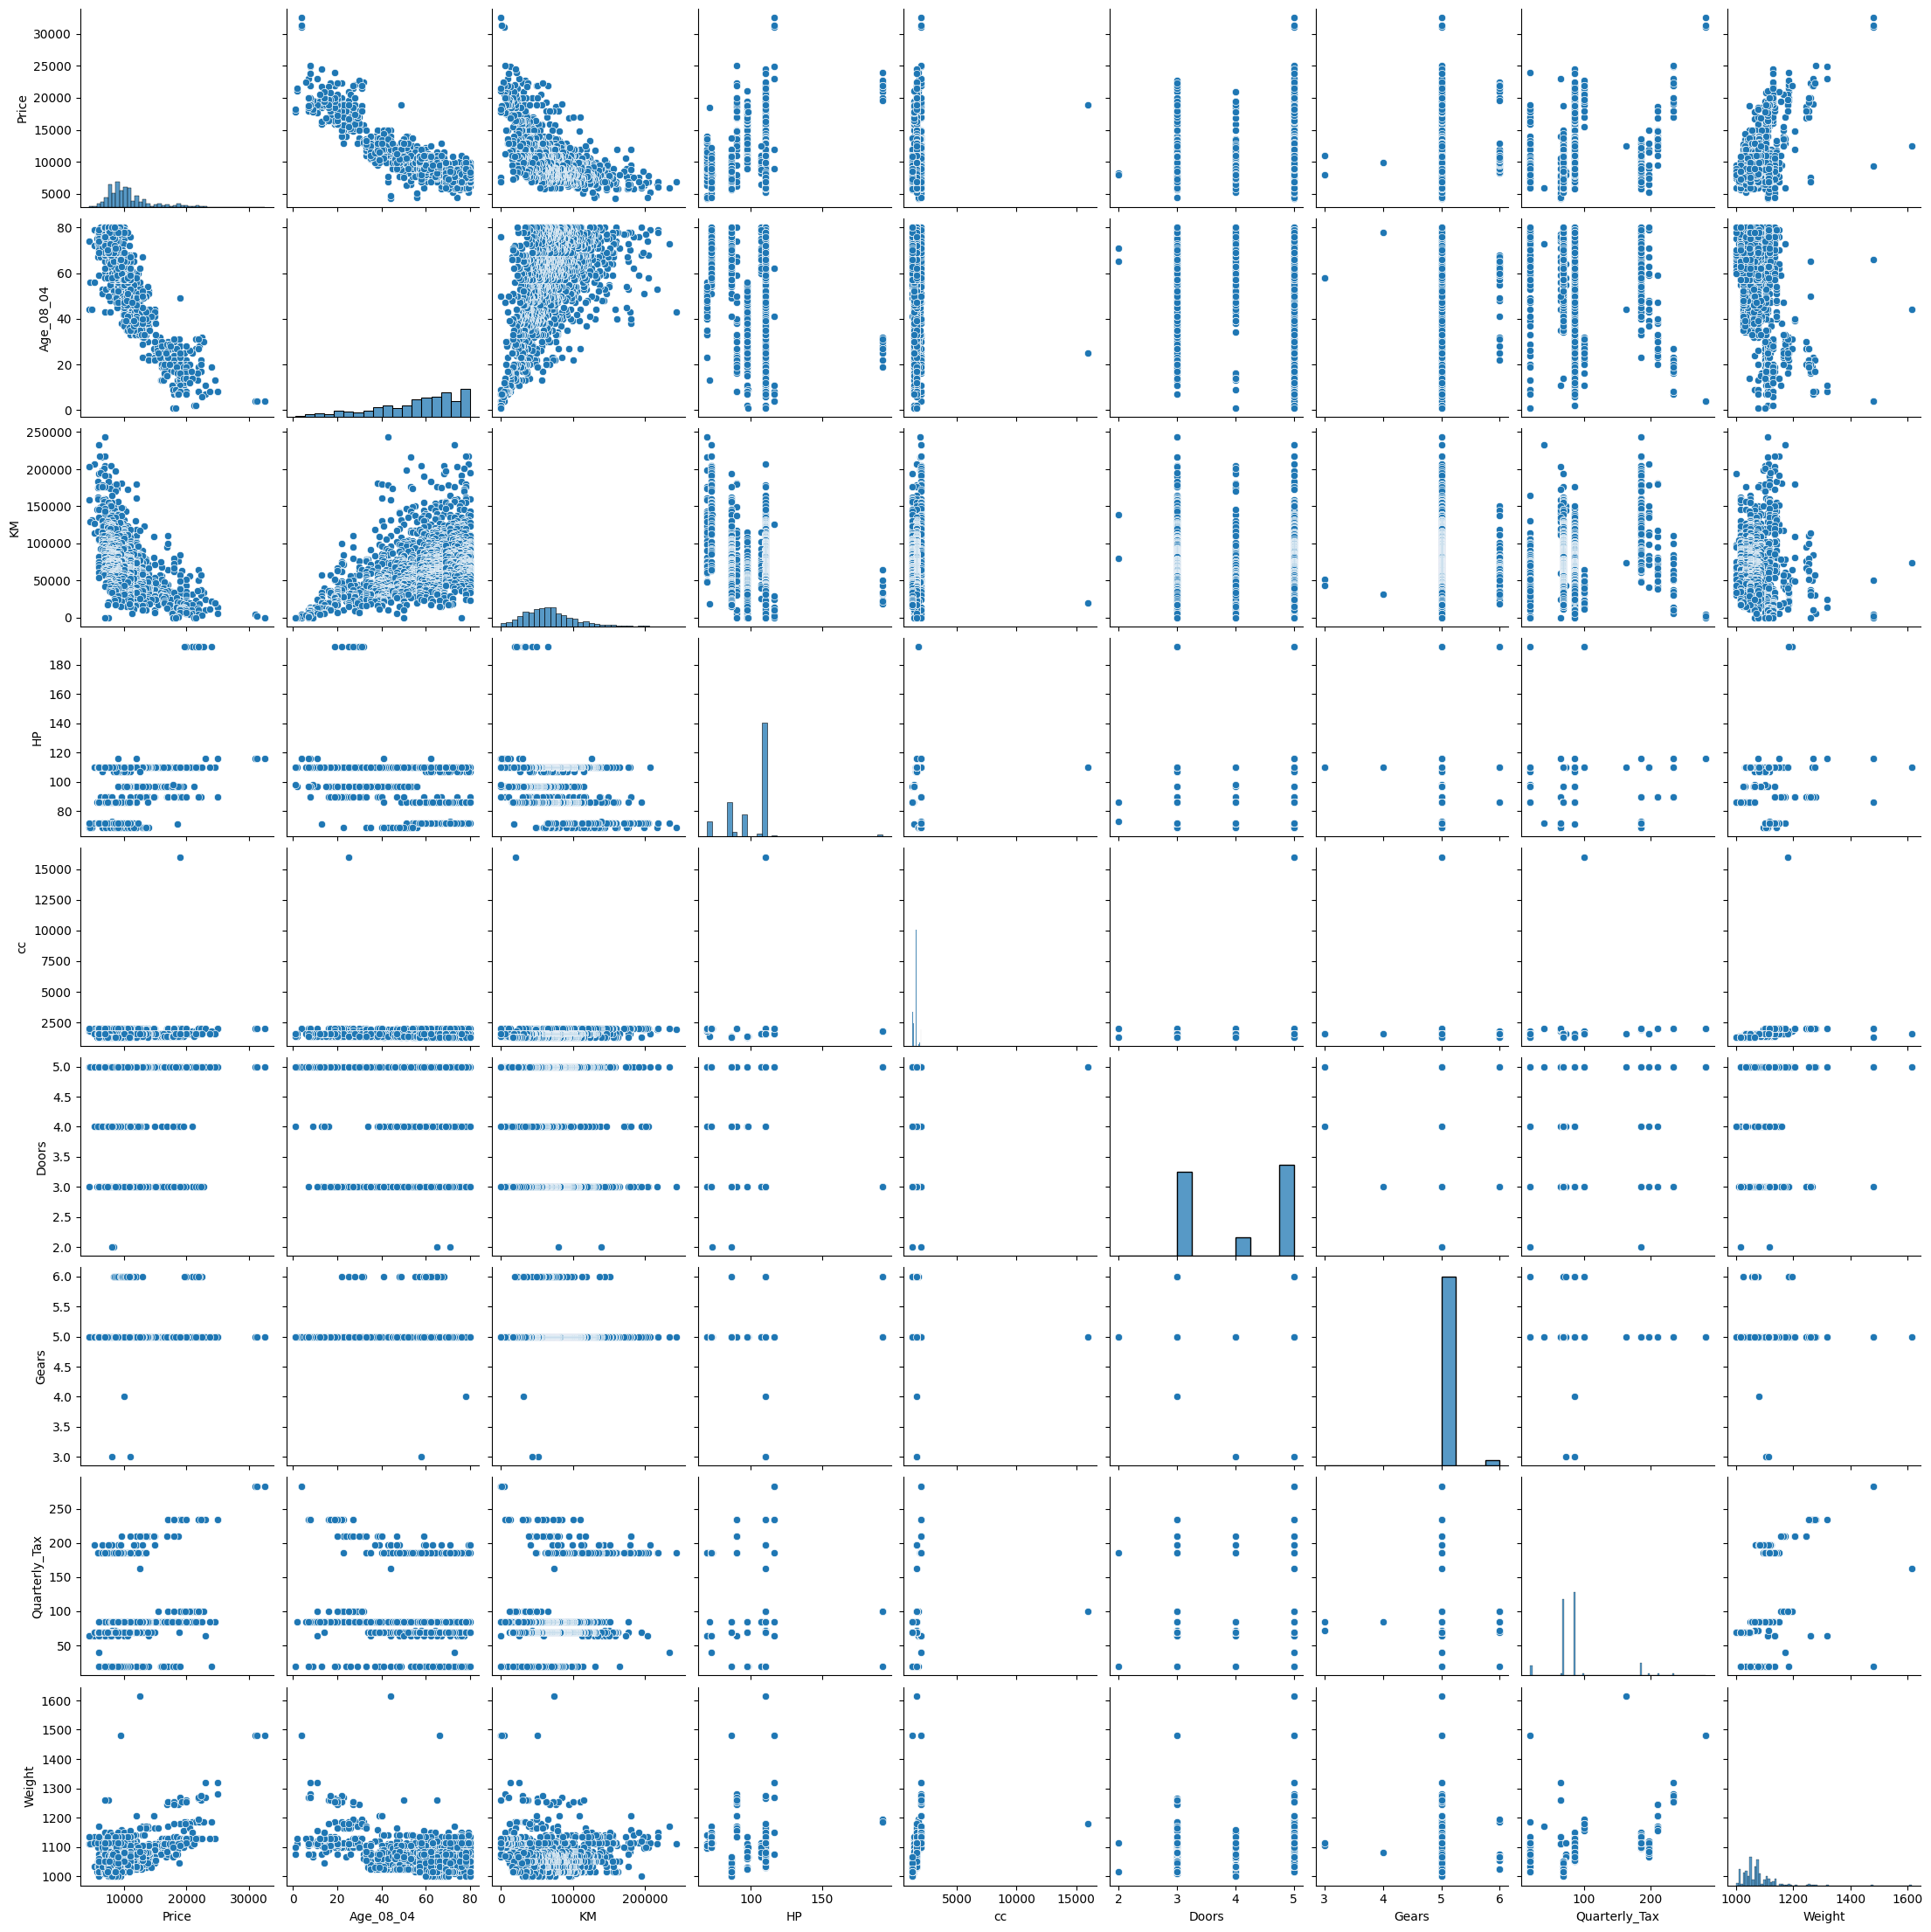

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df2)

In [ ]:
df2=df2.rename({'Age_08_04':'Age','Quarterly_Tax':'Qt'},axis=1)

In [ ]:
df2.head()

,Price,Age,KM,HP,cc,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Model Building

In [ ]:
model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:00:24   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Qt             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#pvalues of cc and Doors are greater than 0.05 so we should build SLR and MLR
mc=smf.ols("Price~cc",data=df2).fit()

In [ ]:
mc.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [ ]:
md=smf.ols("Price~Doors",data=df2).fit()

In [ ]:
md.pvalues

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [ ]:
mcd=smf.ols("Price~cc+Doors",data=df2).fit()

In [ ]:
mcd.pvalues

Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

# Collinearity Check

In [ ]:
#VIF for Age
m1=smf.ols("Age~KM+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()
m1_rsq=m1.rsquared
m1_vif=1/(1-m1_rsq)
m1_vif

1.8762358497682892

In [ ]:
#VIF for KM
m2=smf.ols("KM~Age+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()
m2_rsq=m2.rsquared
m2_vif=1/(1-m2_rsq)
m2_vif

1.75717802398104

In [ ]:
#VIF for HP
m3=smf.ols("HP~Age+KM+cc+Doors+Gears+Qt+Weight",data=df2).fit()
m3_rsq=m3.rsquared
m3_vif=1/(1-m3_rsq)
m3_vif

1.4191801087182137

In [ ]:
#VIF for cc
m4=smf.ols("cc~Age+KM+HP+Doors+Gears+Qt+Weight",data=df2).fit()
m4_rsq=m4.rsquared
m4_vif=1/(1-m4_rsq)
m4_vif

1.1634703645940856

In [ ]:
#VIF for Doors
m5=smf.ols("Doors~Age+KM+HP+cc+Gears+Qt+Weight",data=df2).fit()
m5_rsq=m5.rsquared
m5_vif=1/(1-m5_rsq)
m5_vif

1.1558898658142076

In [ ]:
#VIF for Gears
m6=smf.ols("Gears~Age+KM+HP+cc+Doors+Qt+Weight",data=df2).fit()
m6_rsq=m6.rsquared
m6_vif=1/(1-m6_rsq)
m6_vif

1.0988429081631148

In [ ]:
#VIF for Qt
m7=smf.ols("Qt~Age+KM+HP+cc+Doors+Gears+Weight",data=df2).fit()
m7_rsq=m7.rsquared
m7_vif=1/(1-m7_rsq)
m7_vif

2.295374508985715

In [ ]:
#VIF for Weight
m8=smf.ols("Weight~Age+KM+HP+cc+Doors+Gears+Qt",data=df2).fit()
m8_rsq=m8.rsquared
m8_vif=1/(1-m8_rsq)
m8_vif

2.4871800071791856

In [ ]:
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[m1_vif,m2_vif,m3_vif,m4_vif,m5_vif,m6_vif,m7_vif,m8_vif]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


NO variable has value greater than 20 so there is no collinearity

# Residual Analysis

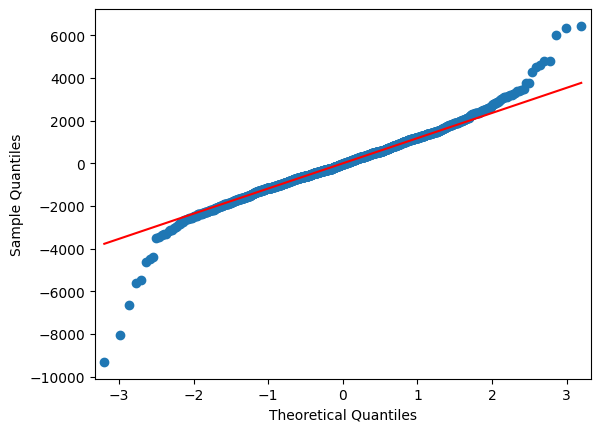

In [ ]:
#test for normality
sm.qqplot(model.resid,line='q')
plt.show()

In [ ]:
#standardized values for both residuals and fitted values

def standardize1(v):
  eqn = (v - v.mean())/v.std()
  return eqn

Text(0, 0.5, 'standardized residual values')

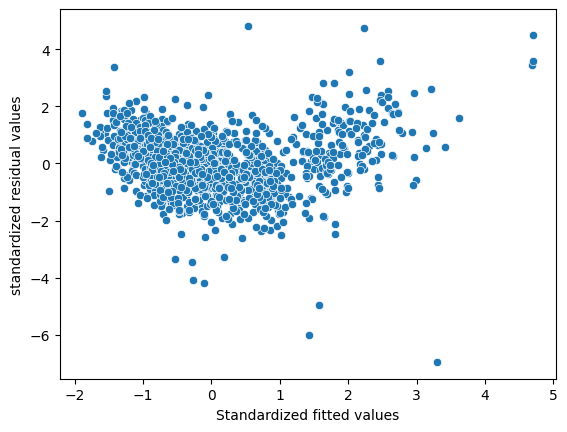

In [ ]:
sns.scatterplot(x = standardize1(model.fittedvalues),y = standardize1(model.resid) )
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")

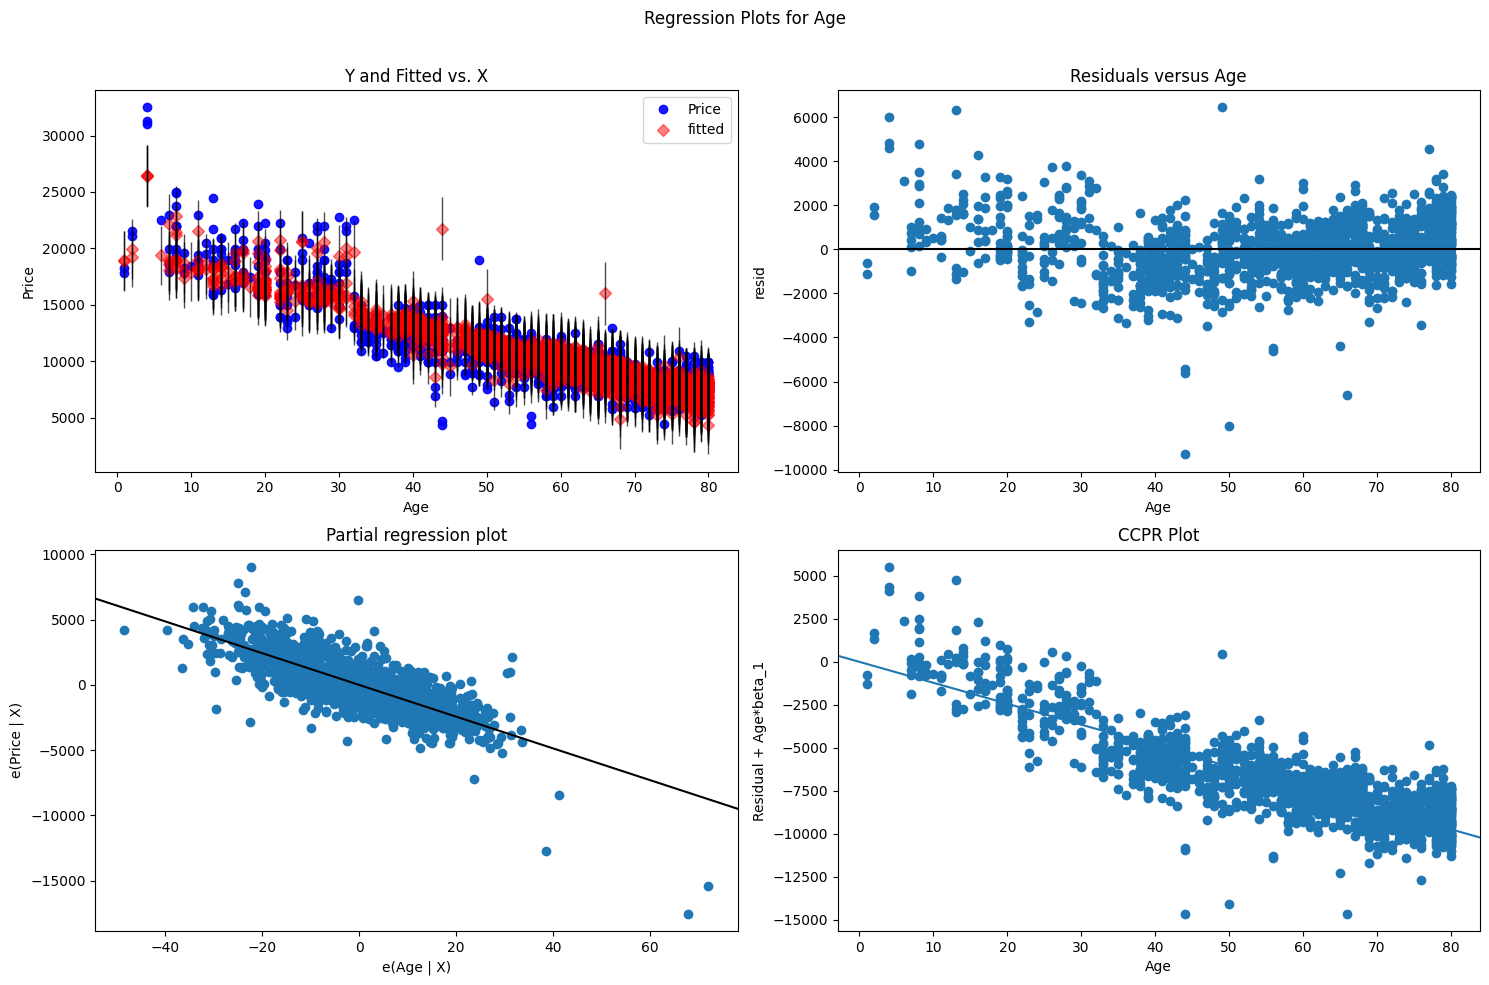

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

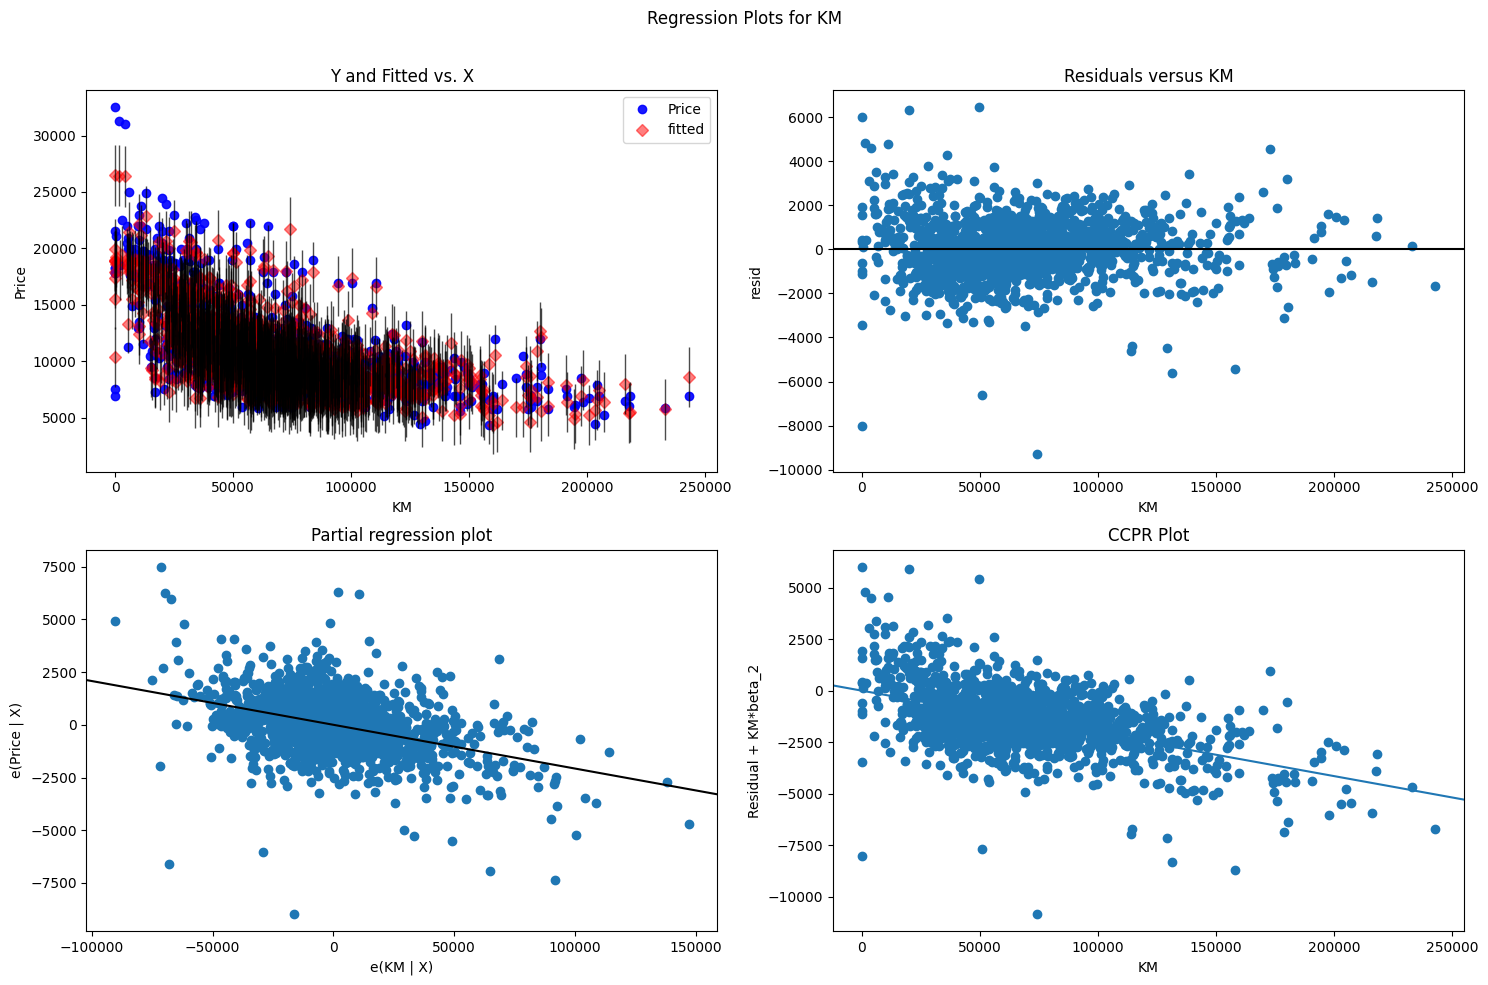

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

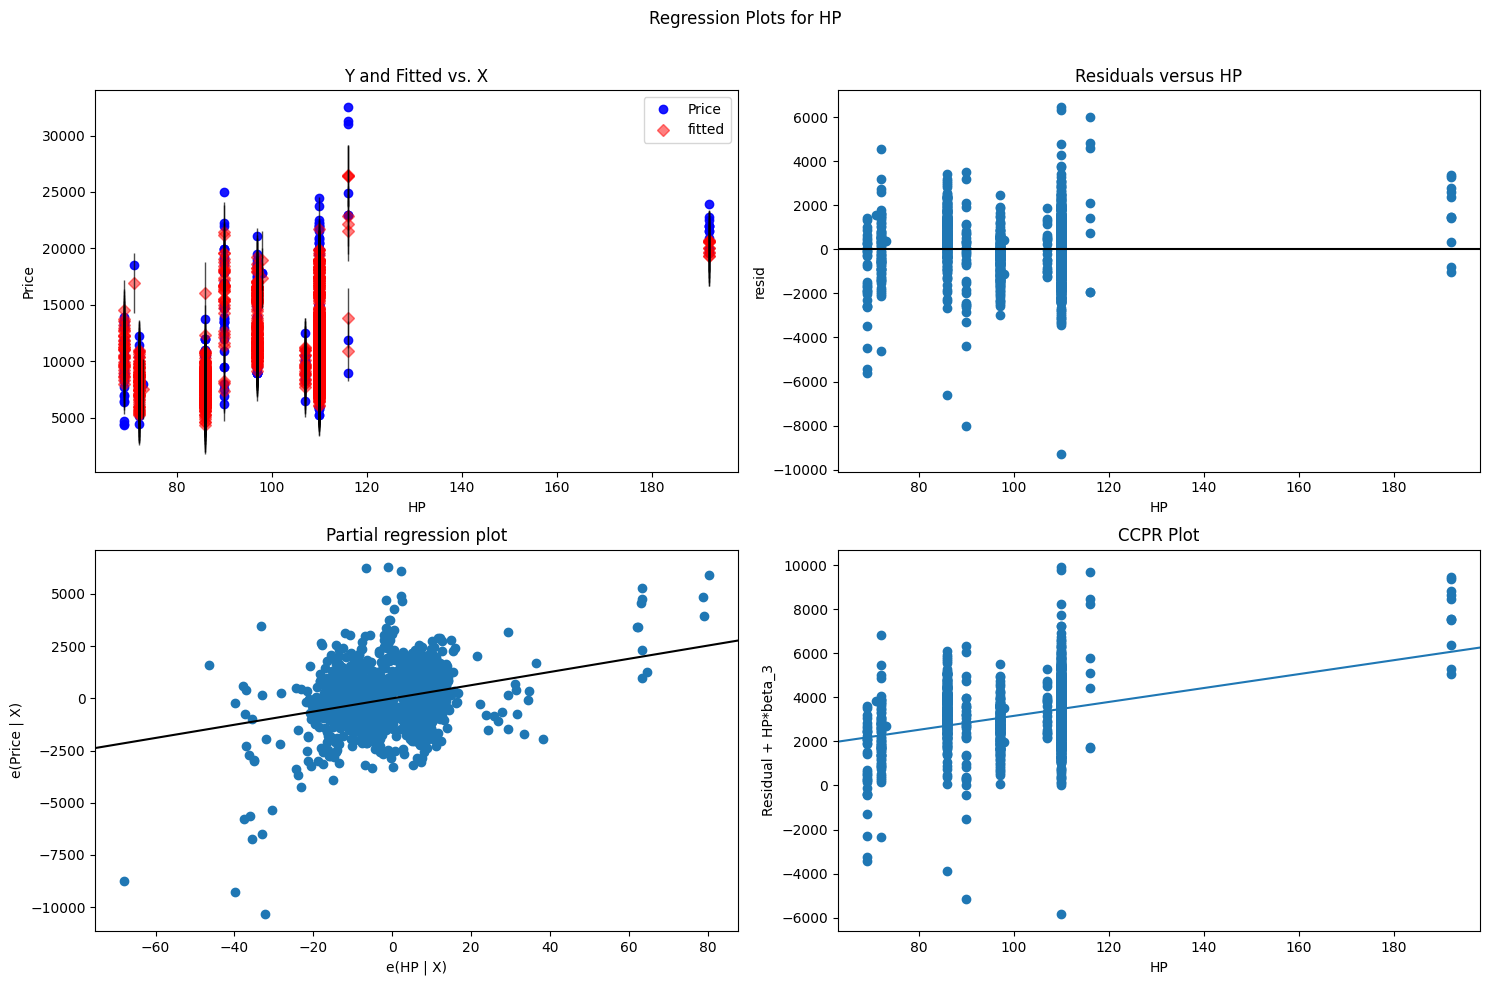

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

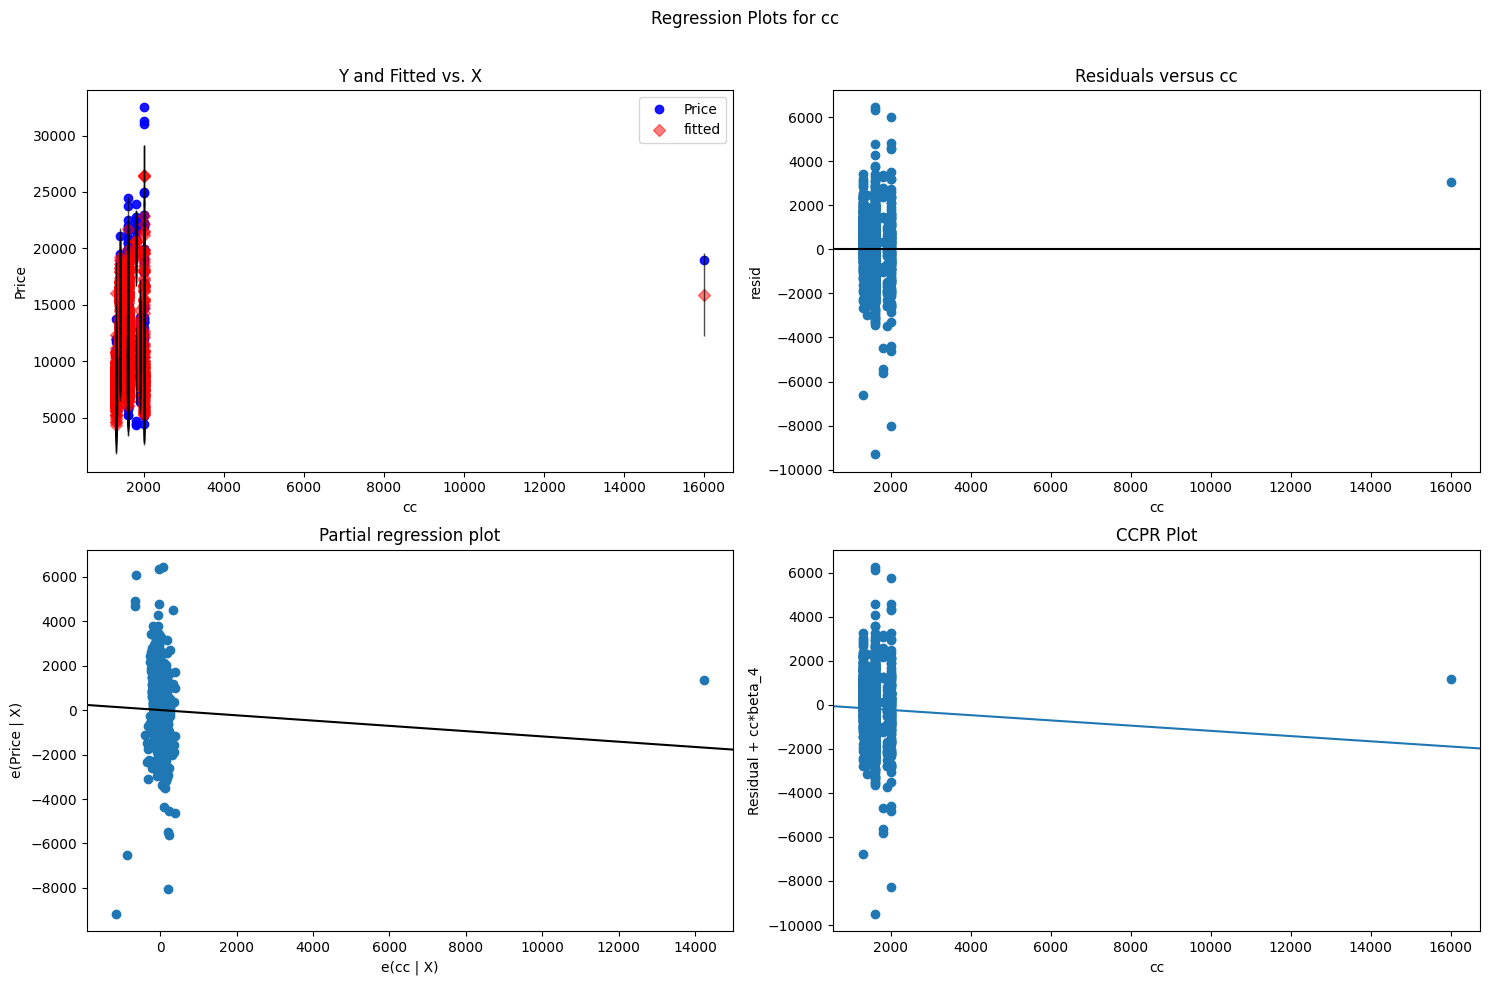

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

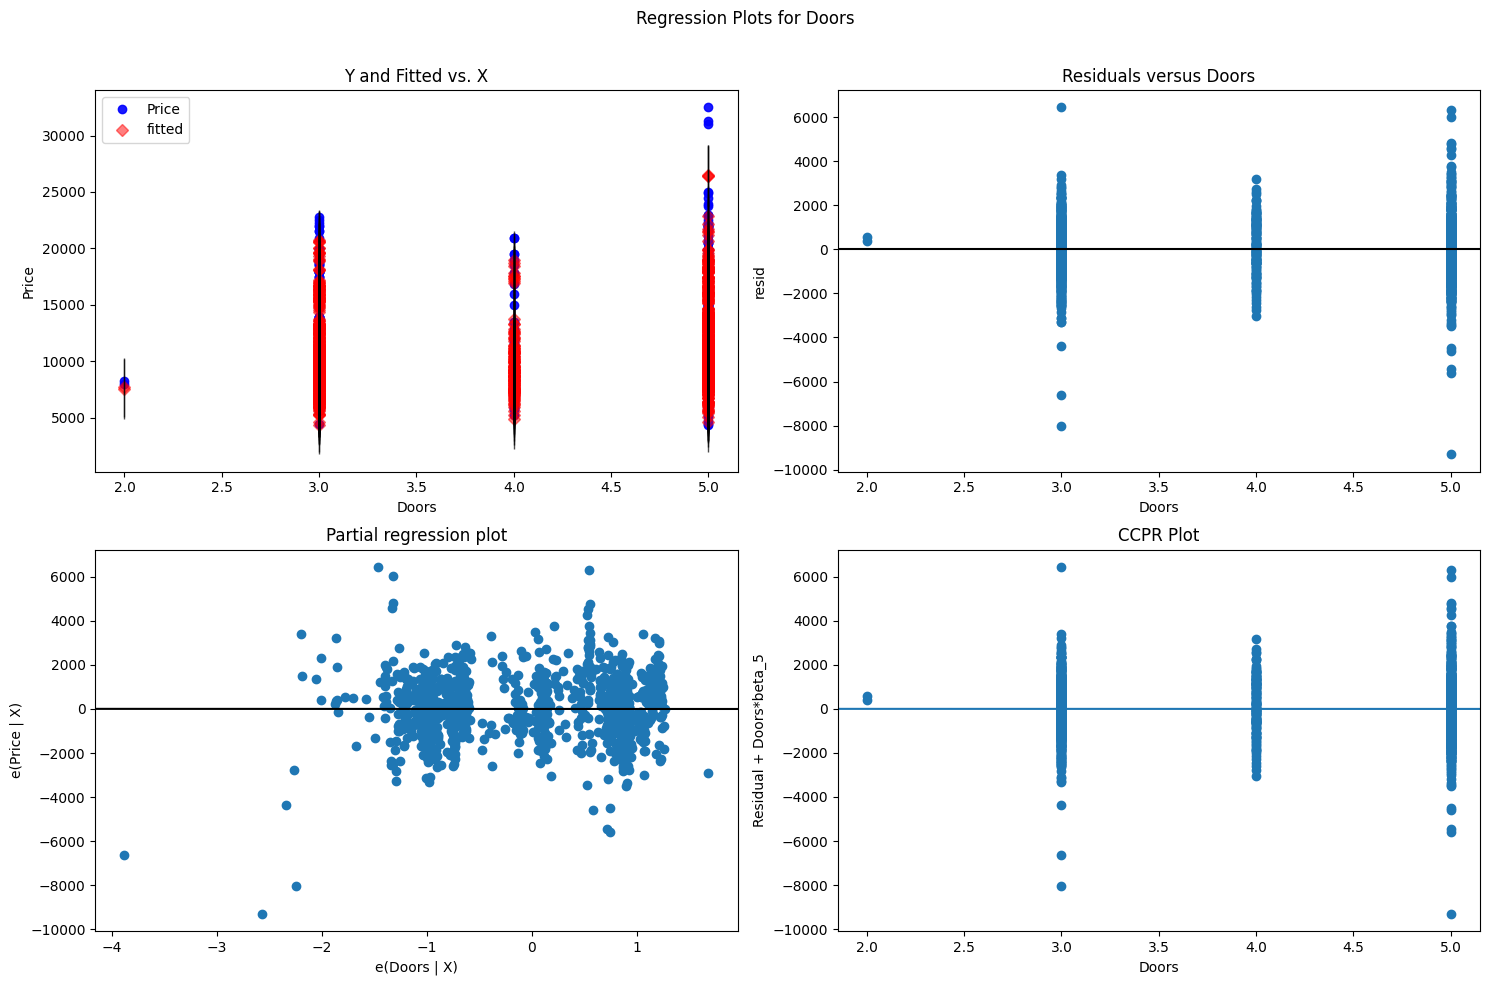

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

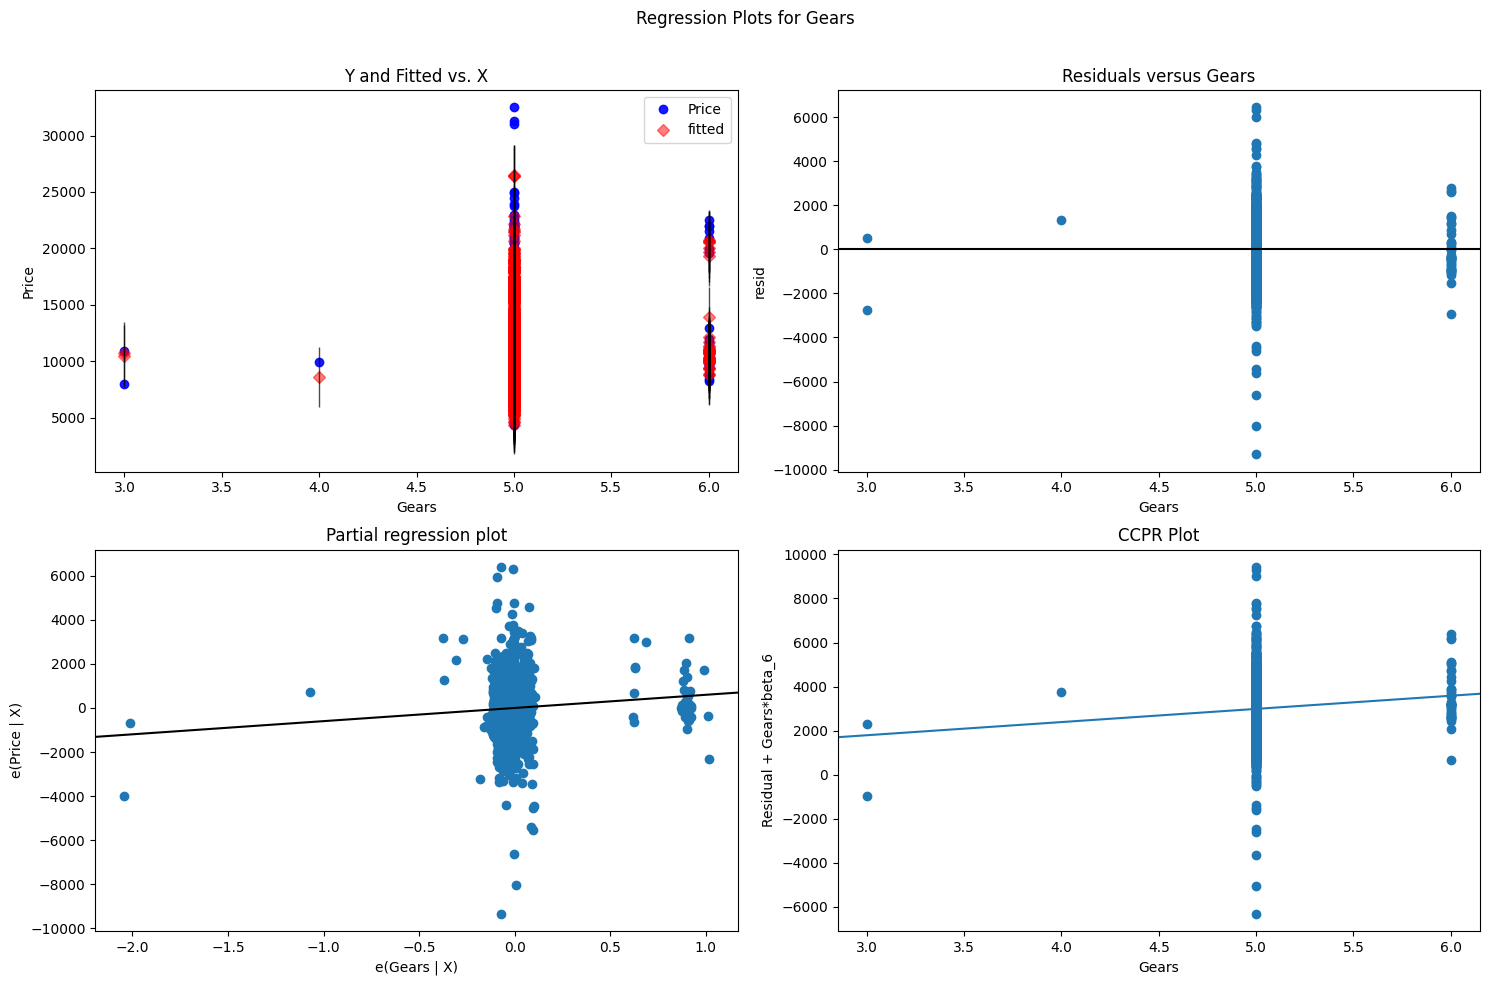

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

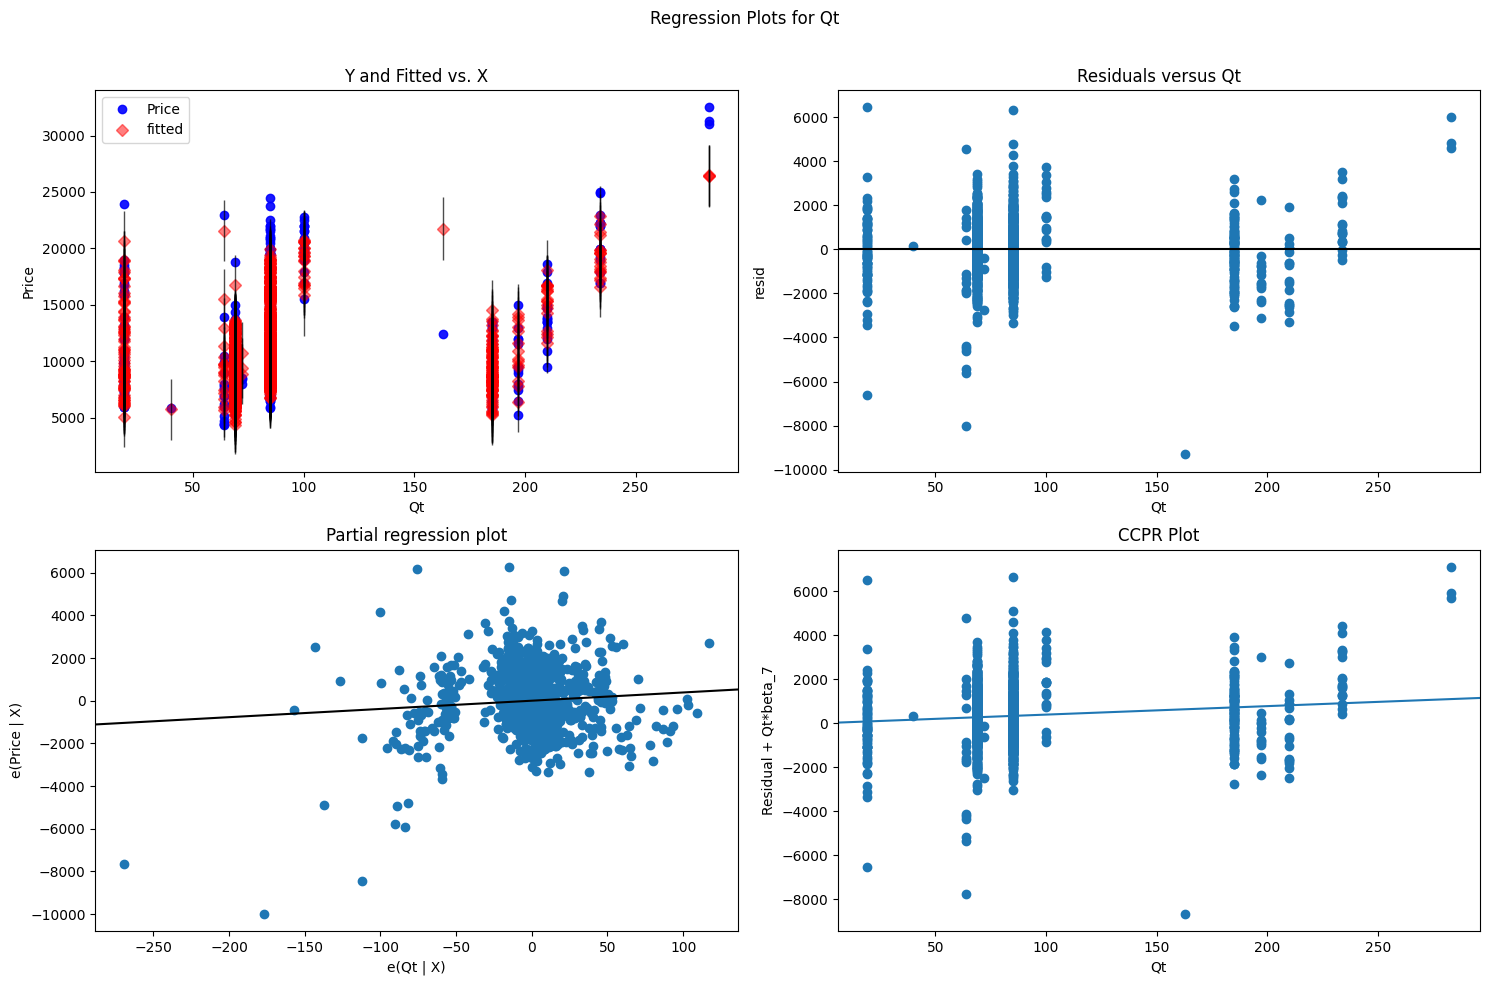

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Qt",fig=fig)
plt.show()

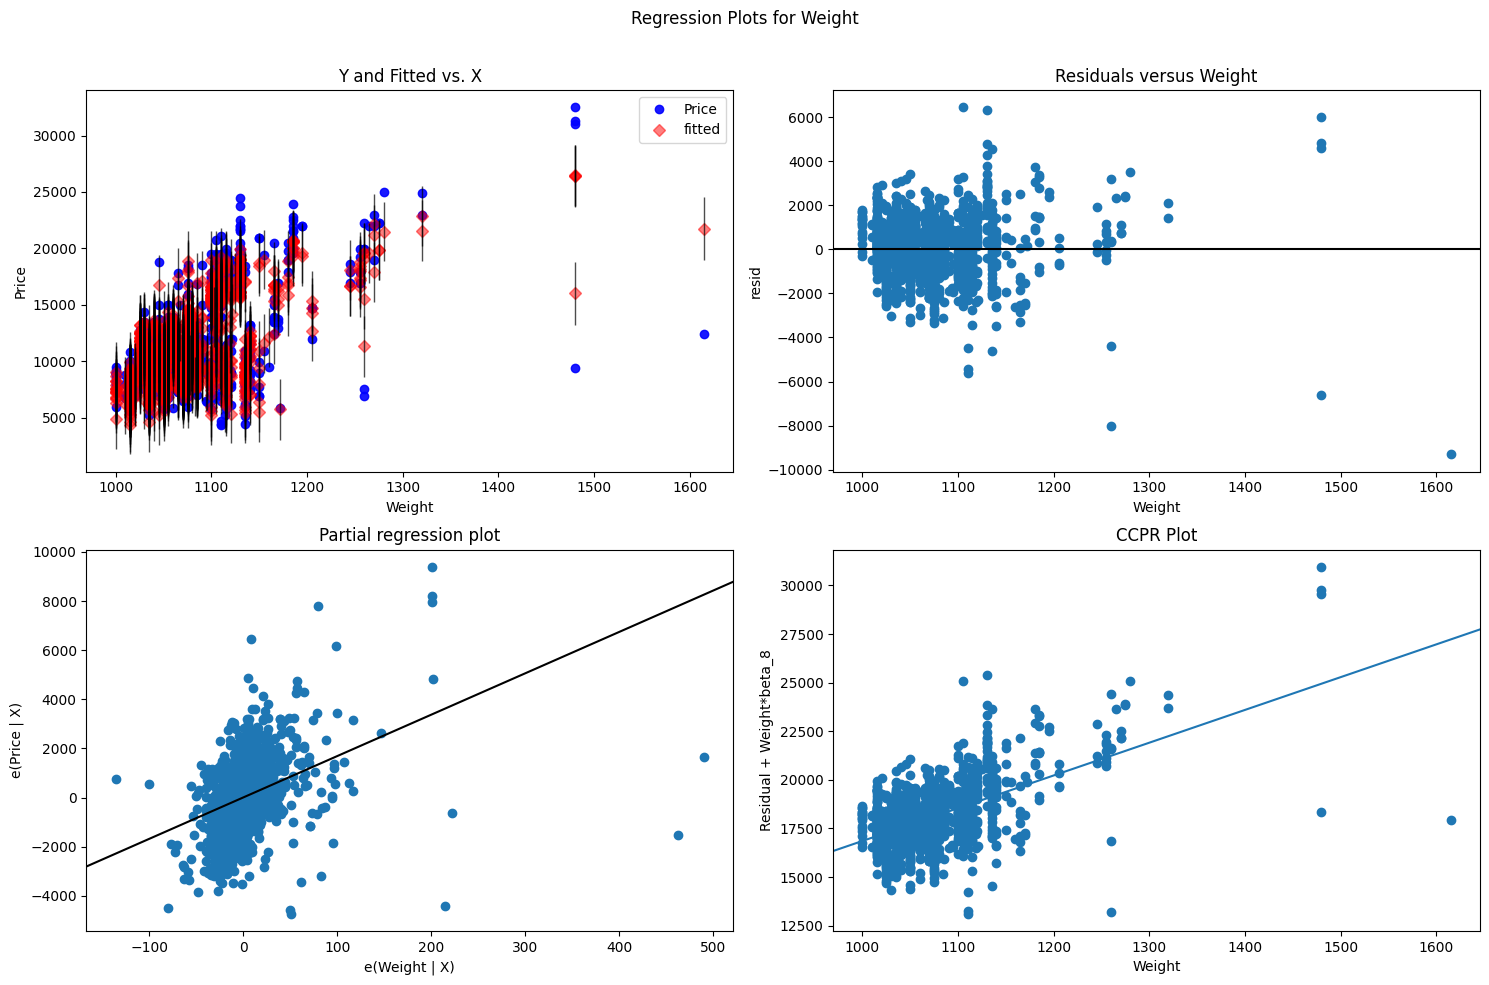

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# Outlier Detection

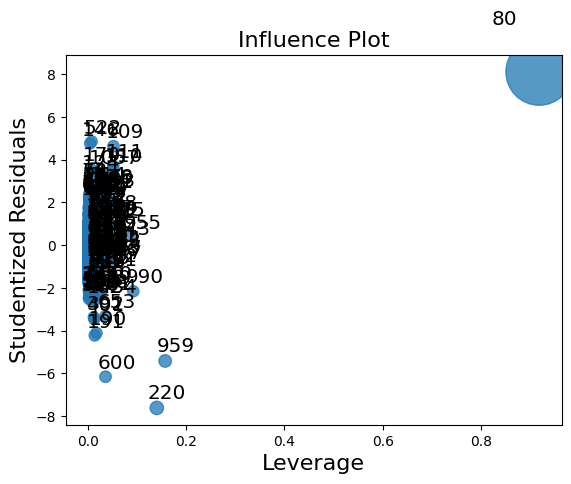

In [ ]:
#detecting influencers or outliers
influence_plot(model)
plt.show()

In [ ]:
k = df2.shape[1] #no. features
n = df2.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [ ]:
df2 = df2.drop(df1.index[80],axis=0).reset_index()

In [ ]:
df2

,index,Price,Age,KM,HP,cc,Doors,Gears,Qt,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df2 = df2.drop("index",axis=1)

In [ ]:
model1=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()

In [ ]:
mfv = model1.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

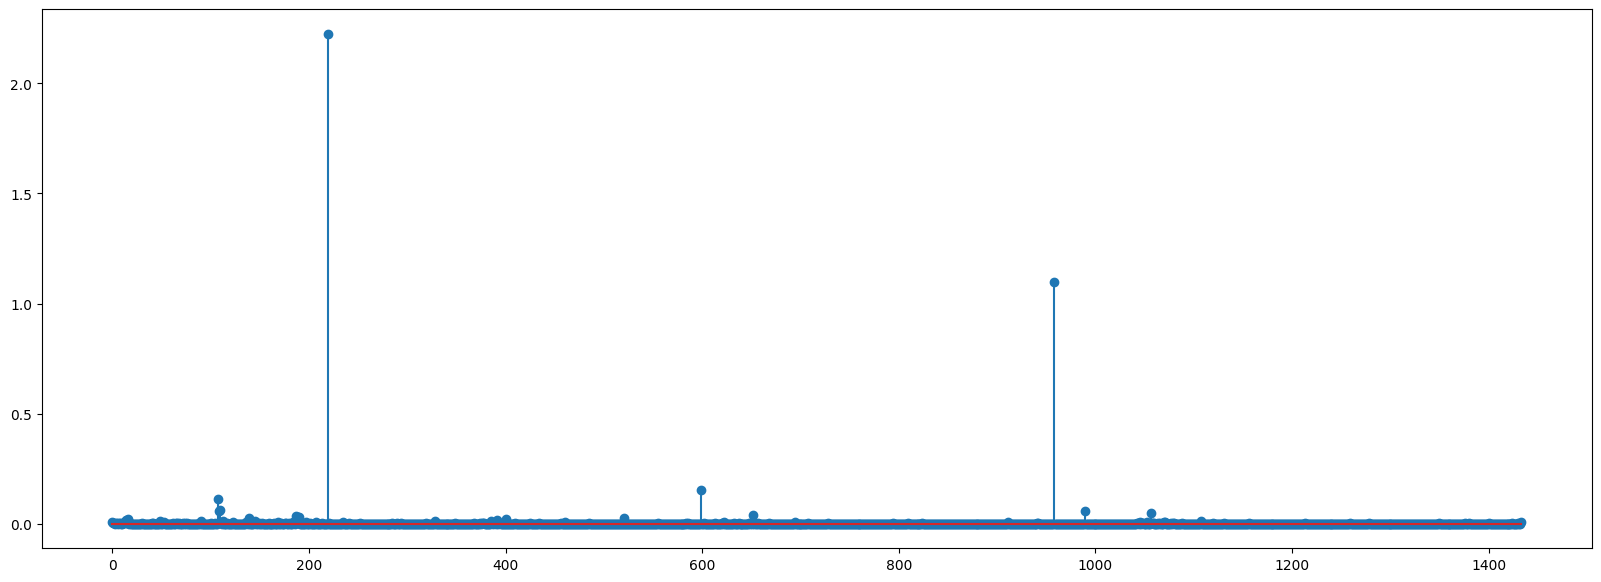

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df2)),np.round(cv,3))

In [ ]:
np.argmax(cv),np.max(cv)

(219, 2.225351365527102)

In [ ]:
df2 = df2.drop(df1.index[219],axis=0).reset_index()
df2 = df2.drop("index",axis=1)

In [ ]:
df2

,Price,Age,KM,HP,cc,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
model2=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()

In [ ]:
mfv = model2.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

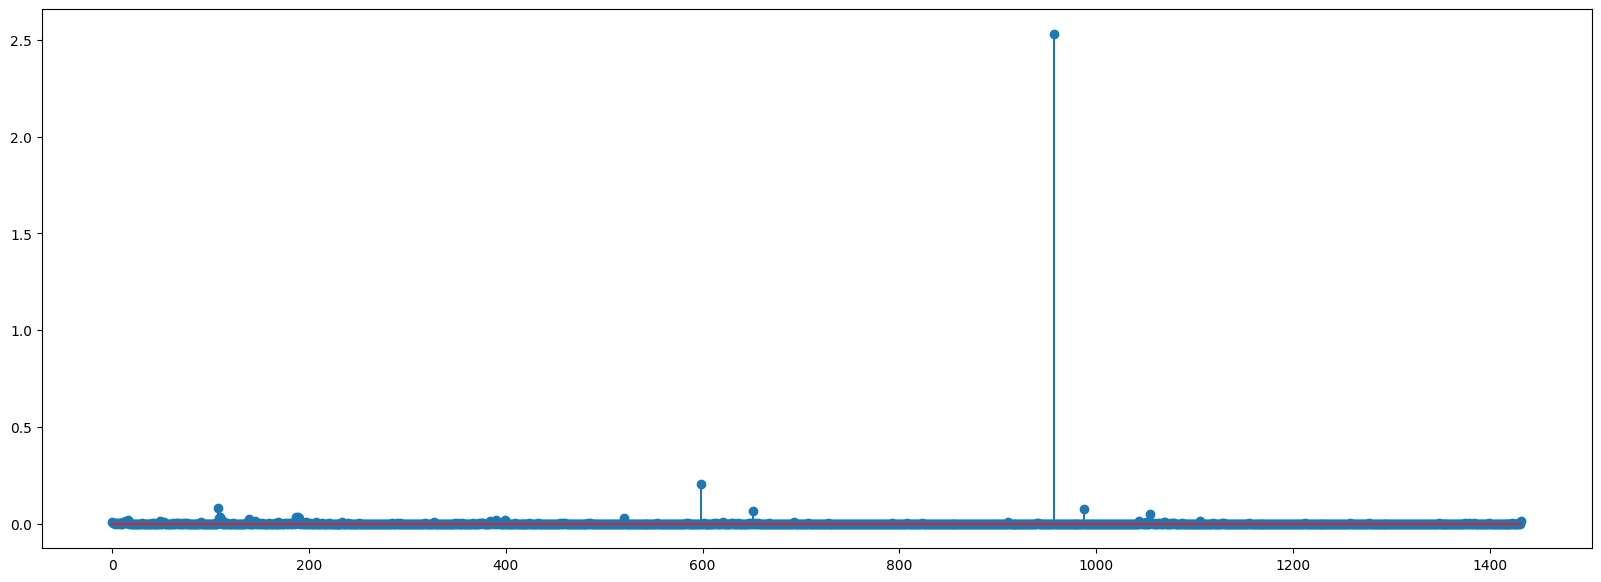

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df2)),np.round(cv,3))

In [ ]:
np.argmax(cv),np.max(cv)

(957, 2.53077962327821)

In [ ]:
df2 = df2.drop(df1.index[957],axis=0).reset_index()

In [ ]:
df2 = df2.drop("index",axis=1)

In [ ]:
model3=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()

In [ ]:
mfv = model3.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

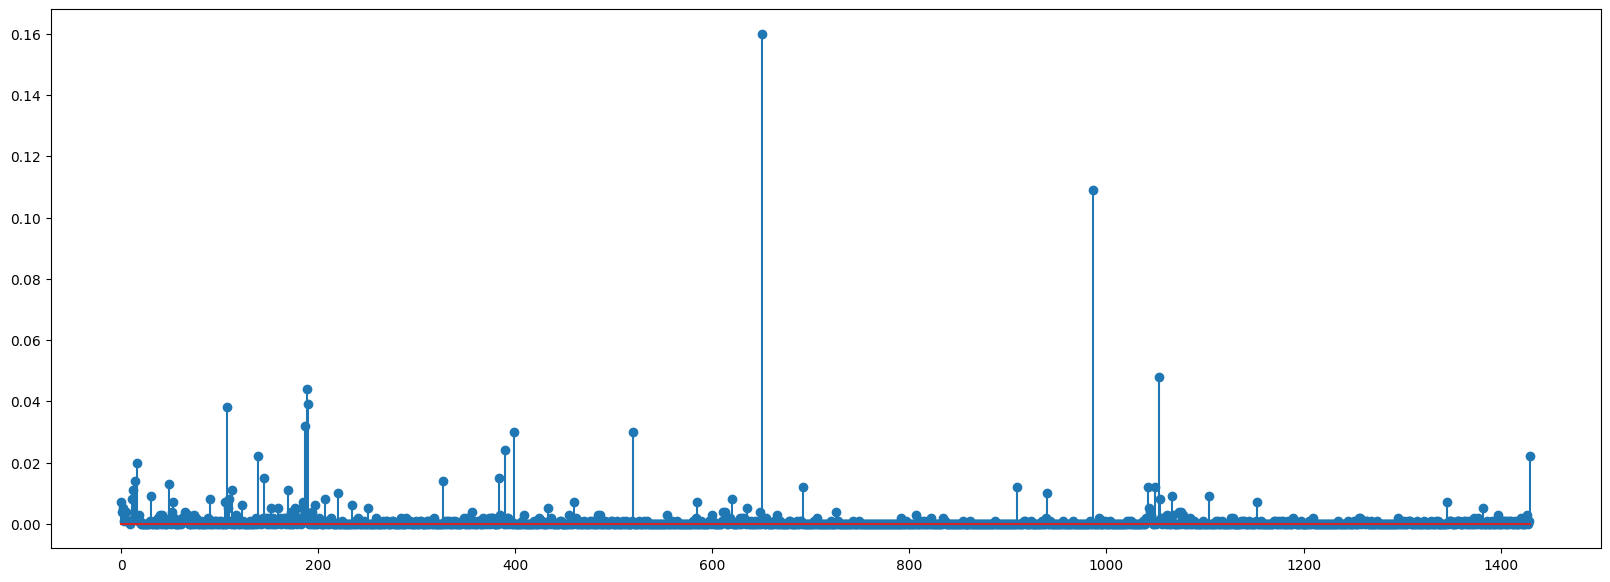

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df2)),np.round(cv,3))

In [ ]:
np.argmax(cv),np.max(cv)

(598, 0.3168903540145446)

In [ ]:
df2 = df2.drop(df1.index[598],axis=0).reset_index()
df2 = df2.drop("index",axis=1)

In [ ]:
model4=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()

In [ ]:
mfv = model4.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

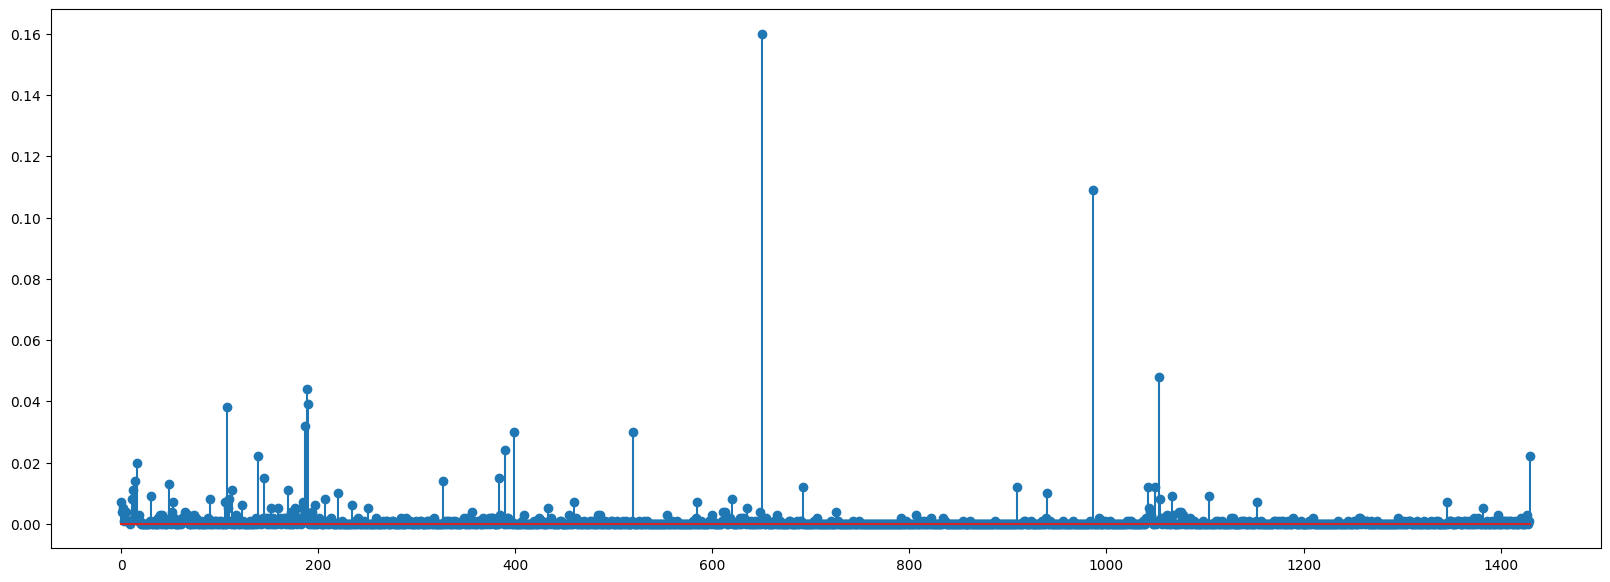

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df2)),np.round(cv,3))

As all the cook's distance values are less than 0.2 we can stop the computation

In [ ]:
final_model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight",data=df2).fit()

In [ ]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:07:12   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age         -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM            -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP            34.2632      2.714     12.625      0.000      28.940      39.587
cc            -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors       -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears        469.5788    177.682      2.643      0.008     121.033     818.125
Qt             3.6472      1.363      2.676      0.008       0.973       6.321
Weight        32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Predictions

In [ ]:
ypred=final_model.predict(df2)
ypred

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

In [ ]:
d2={'Prep_Models':['model','model1','model2','model3','final_model'],"R^2_value":[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,final_model.rsquared]}
R2table=pd.DataFrame(d2)
R2table

,Prep_Models,R^2_value
0,model,0.862520
1,model1,0.868116
2,model2,0.876593
3,model3,0.883968
4,final_model,0.888240
